1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [ ]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Initial number of Thallium atoms
tau = 3.0502 * 60  # Half-life in seconds
T_max = 1000  # Total time in seconds

# Initialize variables
N_v = []  # Number of decayed atoms over time
N_dec = 0  # Initial count of decayed atoms

# Simulation loop
for t in range(T_max):
    # Time-dependent decay probability
    p_t = 1 - 2**(-1 / tau)
    # Determine the number of atoms that decay in this time step
    decayed = npr.binomial(N - N_dec, p_t)
    # Update the number of decayed atoms
    N_dec += decayed
    # Record the number of decayed atoms
    N_v.append(N_dec)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(T_max), N_v, label="Pb (Decayed)", color="blue")
plt.plot(range(T_max), [N - nv for nv in N_v], label="Tl (Remaining)", color="orange")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Number of Atoms")
plt.legend()
plt.title("Decay Simulation of Tl to Pb")
plt.grid()
plt.show()


: 

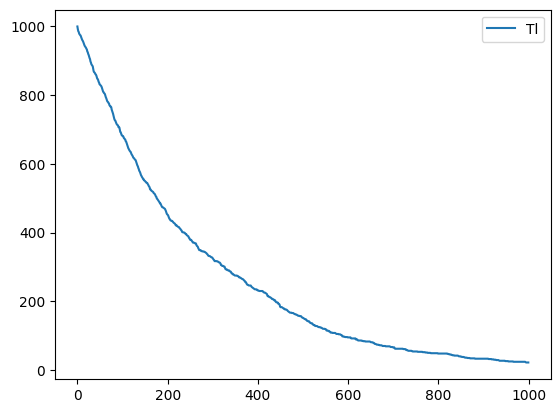

In [60]:
#Second method
u=npr.random(T_max)
y=-tau/np.log(2) * np.log(1-u)

N_dec2=[np.sum([1 if y < t else 0 for y in y]) for t in range(T_max)] #atoms that have decayed
N_dec2=np.ones(T_max)*N-N_dec2
plt.plot(range(T_max),N_dec2,label="Tl")
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [78]:
num_particles=int(1e6)
a0=5.29*1e-11

x=npr.normal(loc=0,scale=a0/100,size=num_particles)
y=npr.normal(loc=0,scale=a0/100,size=num_particles)
b=np.sqrt(x**2+y**2)

th=2*np.atan(2.955*1e-14/b)
n_bounce= len(th[th>np.pi/2])
print("The fraction of particles that bounce back is: ",n_bounce/num_particles*100,"%")

The fraction of particles that bounce back is:  0.1588 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [123]:
def f(x):
    return np.sin(1/(x*(2-x)))**2

#Hit/ miss method
N=10000 #number of samples
u=npr.random(N)
x=npr.random(N)*2 #random numbers in domain [0,2]
k= len(u[u<f(x)]) #Success generated samples
I=k*2/N
print("integral with hit/miss method: ",I)

#Mean value method
I2=2*np.sum(f(x))/N
print(f"integral with mean value method: {I2:.5}")

integral with hit/miss method:  1.455
integral with mean value method: 1.456


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [245]:
from scipy import linalg as la
import numpy.random as npr

def f(x):
    if la.norm(x)<=1:
        return 1
    else:
        return 0

#Hit/ miss method
#in d dimension
d=10
N=10000
x=npr.rand(N,d)*2-1 #Centered hypercube
V=2**d
count=0
for i in np.arange(len(x)):
    count+=f(x[i,:])
I=V*count/N
I

2.2528

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [ ]:
N=1000
z=np.linspace(1e-4,1,N)

def w(x):
    return 1/(np.sqrt(x))

def rw(n): #sampling from the distribution (Inverse transform Method)
    u=npr.random(n)
    return u**2

def f(x):
    return x**(-0.5)/(np.exp(x)+1)

x= rw(N) #sampling w.r.t. the new distribution w(x)

I=2/N*np.sum(f(x)/w(x)) #normalization of w(x) is 2

print("The value of the integral (importance sampling) is", I)

: 